Imports

In [1]:
# numpy is the standard python array / vector library. We will use it to represent probabilities
import numpy as np
import scipy
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

### <b>1b. Free coding</b>

The main idea of this notebook is to have the code from 1a_perception_action_loop_tutorial, but without the text, so that the numbers in the code don't contradict the numbers in the text when something was changed.

We will first specify all parts of the generative model (1b.1.) and then run inference. So for trying out different numbers in different parts of the model, you only need to make changes in one section. The rest will run and plot results based on what was specified.

#### <b>1b.1. The generative model</b>

For this example, let us assume there are only two possible states, outcomes and actions:
* Possible states are "good" and "bad" mood
* Possible observations are "purr" and "walk away"
* Possible actions are "pet" and "carry around"

The generative model looks like this

<img src="Generative_Model.png" width="200"/>

The model has four main parts:

* A prior over the first state $s_{t}$ that tells us, without having collected any further information, how likely Schmüffie typically is in einer a "good" or bad mood (see also 1.2.).
* An observation likelihood that connects the hidden states $s_{t}$ and $s_{t+1}$ to the observations we are able to receive, i.e. $o_{t}$ and $o_{t+1}$, i.e. what's the likelihood of a specific observation given a specific state (see also 1.3.)
* A state transition probability that connects the current state $s_{t}$ and the action $a_{t}$ to possible future states and their probabilities (see also 1.6.)
* A prior over the action $a_{t}$ which biases action selection towards repeating actions (see also 1.8.)

<img src="State_prior_gen_mod.png" width="213"/><img src="Observation_likelihood_gen_mod.png" width="200"/><img src="State_transition_gen_mod.png" width="200"/><img src="Action_prior_gen_mod.png" width="200"/>

We will specify the model in one go, so that you can modify all numbers in one place

#### <b>1b.1.1. The state prior</b>

The prrior $p(s_{t})$ over states is defined in the code cell

In [2]:
# now we write the same thing in code:
# we use the standard python array library numpy to represent the vector as an array

prior_states = np.array([0.75, 0.25])

print("this is the prior over states")
print(prior_states)

this is the prior over states
[0.75 0.25]


And plot the values

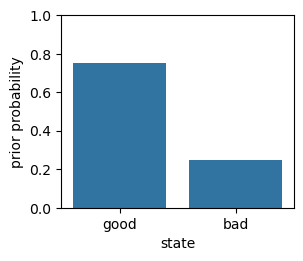

In [3]:
plot_prior = pd.DataFrame({"state": ["good", "bad"], "prior probability": prior_states})

plt.figure(figsize=[3,2.5])
sns.barplot(data=plot_prior, x="state", y="prior probability")
plt.ylim([0,1])
plt.show()

#### <b>1b.1.2. The observation likelihood</b>

The observation likelihood $p(o_{t}|s_{t})$ is defined below

In [4]:
# now we write the matrix in code
# Note that python indexes from 0, so observation_likelihood[0] is purr, and [1] is walk

observation_likelihood = np.array([[0.9, 0.2], 
                                   [0.1, 0.8]])

print("observation likelihood")
print(observation_likelihood)

observation likelihood
[[0.9 0.2]
 [0.1 0.8]]


And we can plot the values for both states

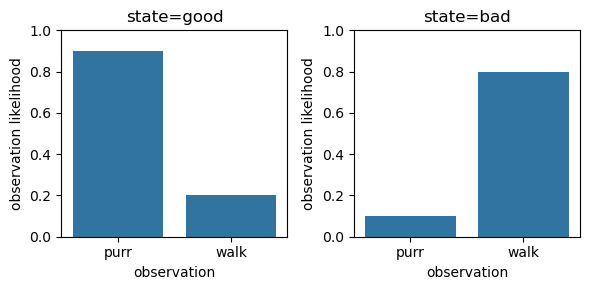

In [5]:
plot_obs_like_good = pd.DataFrame({"observation": ["purr", "walk"], "observation likelihood": observation_likelihood[0]})
plot_obs_like_bad = pd.DataFrame({"observation": ["purr", "walk"], "observation likelihood": observation_likelihood[1]})

fig, ax = plt.subplots(ncols=2,figsize=[6,3])
sns.barplot(data=plot_obs_like_good, x="observation", y="observation likelihood", ax=ax[0])
ax[0].set_ylim([0,1])
ax[0].set_title("state=good")
sns.barplot(data=plot_obs_like_bad, x="observation", y="observation likelihood", ax=ax[1])
ax[1].set_ylim([0,1])
ax[1].set_title("state=bad")
plt.tight_layout()
plt.show()

#### <b>1b.1.3. Action-dependent state transitions</b>

The state transition matrices $p(s_{t+1}|s_{t},a_{t})$ are defined below

In [6]:
# the action-dependent state-transition matrix

state_transition_matrix = np.array([
    [[0.99, 0.6],
     [0.01, 0.4]],
    [[0.3, 0.1],
     [0.7, 0.9]]
])

print("state transition matrix for action pet")
print(state_transition_matrix[0,:,:])

print("state transition matrix for action carry")
print(state_transition_matrix[1,:,:])

state transition matrix for action pet
[[0.99 0.6 ]
 [0.01 0.4 ]]
state transition matrix for action carry
[[0.3 0.1]
 [0.7 0.9]]


#### <b> 1b.1.4. Prior over actions</b>

To finalize our generative model, we specify the prior over actions
$p(a_{t})$

In [7]:
prior_actions = np.array([0.67, 0.33])

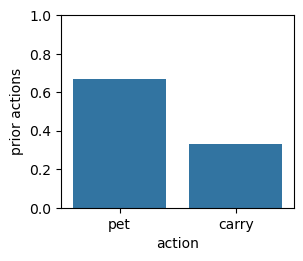

In [8]:
plot_prior_actions = pd.DataFrame({"action": ["pet", "carry"], "prior actions": prior_actions})

plt.figure(figsize=[3,2.5])
sns.barplot(data=plot_prior_actions, x="action", y="prior actions")
plt.ylim([0,1])
plt.show()

#### <b>1b.2. Perception as inference</b>

 <img src="Perception_in_loop_bubble.png" width="650"/> 

This process corresponds to using our knowledge above about prior and likelihood to calculate the posterior over states, as depicted in yellow below

 <img src="Inference_gen_mod.png" width="200"/>

Here, we try to answer the question "if I perceived a specific observation, what was Schmüffie's mood?"

Bayes' theorem allows us to use the knowldge above and invert it to draw this conclusion:

$$p(s_{t}|o_{t}) = \frac{p(o_{t}|s_{t})p(s_{t})}{p(o_{t})} \propto p(o_{t}|s_{t})p(s_{t})$$

For illustration purposes we ignore the experience we set above in this section, and look at examples for both observations and what happens when the generative model is different.

First, let's see using code what the posterior is when having seen "purr"

In [9]:
# since purr was the upper row, and python indexes from 0, the purr row is index 0
# if we want to make sure that this is correct, we can print the row
print("observation likelihood for purring")
print(observation_likelihood[0])

# multiply row with prior
unnormalized_posterior_states_purr = observation_likelihood[0] * prior_states

print("unnormalized posterior states for observation purring")
print(unnormalized_posterior_states_purr)

# and in order to get a probability of each state, we normalize this
posterior_states_purr = unnormalized_posterior_states_purr / unnormalized_posterior_states_purr.sum()

print("normalized posterior over states for observation purring")
print(posterior_states_purr)

observation likelihood for purring
[0.9 0.2]
unnormalized posterior states for observation purring
[0.675 0.05 ]
normalized posterior over states for observation purring
[0.93103448 0.06896552]


And plot the values

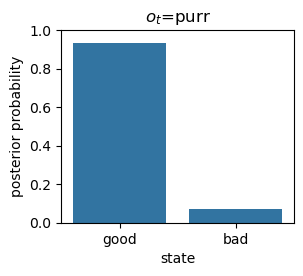

In [10]:
plot_posterior_purr = pd.DataFrame({"state": ["good", "bad"], "posterior probability": posterior_states_purr})

plt.figure(figsize=[3,2.5])
sns.barplot(data=plot_posterior_purr, x="state", y="posterior probability")
plt.ylim([0,1])
plt.title("$o_{t}$=purr")
plt.show()

We can apply the same operation for the case when we perceived "walking away"

In [11]:
# posterior over states for "walk away"

# use index 1 to get walk away row
print("observation likelihood for walk away")
print(observation_likelihood[1])

# multiply row with prior
unnormalized_posterior_states_walk = observation_likelihood[1] * prior_states

print("unnormalized posterior states for observation walk away")
print(unnormalized_posterior_states_walk)

# and in order to get a probability of each state, we normalize this
posterior_states_walk = unnormalized_posterior_states_walk / unnormalized_posterior_states_walk.sum()

print("normalized posterior over states for observation walk away")
print(posterior_states_walk)

observation likelihood for walk away
[0.1 0.8]
unnormalized posterior states for observation walk away
[0.075 0.2  ]
normalized posterior over states for observation walk away
[0.27272727 0.72727273]


And plot the values

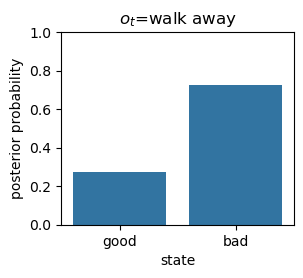

In [12]:
plot_posterior_walk = pd.DataFrame({"state": ["good", "bad"], "posterior probability": posterior_states_walk})

plt.figure(figsize=[3,2.5])
sns.barplot(data=plot_posterior_walk, x="state", y="posterior probability")
plt.ylim([0,1])
plt.title("$o_{t}$=walk away")
plt.show()

Now, let's play around with some numbers and how it changes inference and the posterior over states

For example a <b>uniform prior</b> over states

In [13]:
# for example a uniform prior over states
uniform_prior_states = np.array([0.5, 0.5])

print("a uniform prior over states")
print(uniform_prior_states)

# for observation "purr"
uniform_prior_unnormalized_posterior_states_purr = observation_likelihood[0] * uniform_prior_states

# and in order to get a probability of each state, we normalize this
uniform_prior_posterior_states_purr = uniform_prior_unnormalized_posterior_states_purr / uniform_prior_unnormalized_posterior_states_purr.sum()

print("normalized posterior over states for observation purring")
print(uniform_prior_posterior_states_purr)

# for "walk away"

# multiply row with prior
uniform_prior_unnormalized_posterior_states_walk = observation_likelihood[1] * uniform_prior_states

# and in order to get a probability of each state, we normalize this
uniform_prior_posterior_states_walk = uniform_prior_unnormalized_posterior_states_walk / uniform_prior_unnormalized_posterior_states_walk.sum()

print("normalized posterior over states for observation walk away")
print(uniform_prior_posterior_states_walk)

a uniform prior over states
[0.5 0.5]
normalized posterior over states for observation purring
[0.81818182 0.18181818]
normalized posterior over states for observation walk away
[0.11111111 0.88888889]


And plot the posteriors for both observations

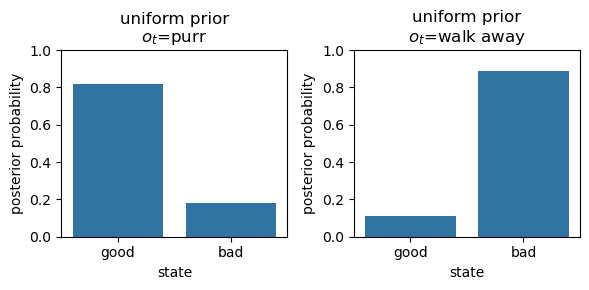

In [14]:
plot_uniform_state_purr = pd.DataFrame({"state": ["good", "bad"], "posterior probability": uniform_prior_posterior_states_purr})
plot_uniform_state_walk = pd.DataFrame({"state": ["good", "bad"], "posterior probability": uniform_prior_posterior_states_walk})

fig, ax = plt.subplots(ncols=2,figsize=[6,3])
sns.barplot(data=plot_uniform_state_purr, x="state", y="posterior probability", ax=ax[0])
ax[0].set_ylim([0,1])
ax[0].set_title("uniform prior\n$o_{t}$=purr")
sns.barplot(data=plot_uniform_state_walk, x="state", y="posterior probability", ax=ax[1])
ax[1].set_ylim([0,1])
ax[1].set_title("uniform prior\n$o_{t}$=walk away")
plt.tight_layout()
plt.show()

For example a <b>a cattier cat</b> (walks away more)

In [15]:
# for example a cattier cat (walks away more), but the previous prior over states (0.75 0.25)
catty_observation_likelihood = np.array([[0.6, 0.05], 
                                         [0.4, 0.95]])

print("catty observation likelihood")
print(catty_observation_likelihood)

# for observation "purr"
catty_unnormalized_posterior_states_purr = catty_observation_likelihood[0] * prior_states

# and in order to get a probability of each state, we normalize this
catty_posterior_states_purr = catty_unnormalized_posterior_states_purr / catty_unnormalized_posterior_states_purr.sum()

print("normalized posterior over states for observation purring")
print(catty_posterior_states_purr)

# for "walk away"

# multiply row with prior
catty_unnormalized_posterior_states_walk = catty_observation_likelihood[1] * prior_states

# and in order to get a probability of each state, we normalize this
catty_posterior_states_walk = catty_unnormalized_posterior_states_walk / catty_unnormalized_posterior_states_walk.sum()

print("normalized posterior over states for observation walk away")
print(catty_posterior_states_walk)

catty observation likelihood
[[0.6  0.05]
 [0.4  0.95]]
normalized posterior over states for observation purring
[0.97297297 0.02702703]
normalized posterior over states for observation walk away
[0.55813953 0.44186047]


And plot the posteriors for both observations

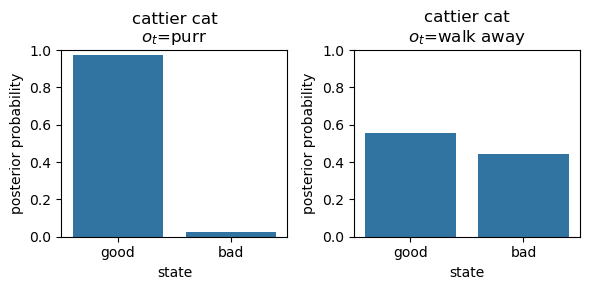

In [16]:
plot_catty_state_purr = pd.DataFrame({"state": ["good", "bad"], "posterior probability": catty_posterior_states_purr})
plot_catty_state_walk = pd.DataFrame({"state": ["good", "bad"], "posterior probability": catty_posterior_states_walk})

fig, ax = plt.subplots(ncols=2,figsize=[6,3])
sns.barplot(data=plot_catty_state_purr, x="state", y="posterior probability", ax=ax[0])
ax[0].set_ylim([0,1])
ax[0].set_title("cattier cat\n$o_{t}$=purr")
sns.barplot(data=plot_catty_state_walk, x="state", y="posterior probability", ax=ax[1])
ax[1].set_ylim([0,1])
ax[1].set_title("cattier cat\n$o_{t}$=walk away")
plt.tight_layout()
plt.show()

Maybe you can come up with some more examples? If so, copy paste the two cells from above below here. Or even change the prior and observation likelihood at the top in 1b.1.!

#### <b>1b.3. Prediction and planning</b>

 <img src="Prediction_in_loop.png" width="600"/> 

Together with the posterior over states, the action-dependent state transition matrices can be used to predict future states and observations for the different actions.

<b>1b.3.1. Predicting states</b>

 <img src="Prediction_gen_mod.png" width="200"/>

As a first prediction example, let us look at our predictions after having seen "purr", and what we predict to happen after doing the action "pet": 

To do this, we run the posterior over states $s_{t}$ through the state transition matrix that corresponds to the action $a_{t}$, to get a prediction for $s_{t+1}$.

Let's see what comes out

In [17]:
# use the numpy matrix multiplication feature "dot"

posterior_future_state_pet_purr = np.dot(state_transition_matrix[0,:,:], posterior_states_purr)

print("posterior over future states after observing purr and doing pet")
print(posterior_future_state_pet_purr)

posterior over future states after observing purr and doing pet
[0.96310345 0.03689655]


We can do the same for the action carry

In [18]:
posterior_future_state_carry_purr = np.dot(state_transition_matrix[1,:,:], posterior_states_purr)

print("posterior over future states after observing purr and doing carry")
print(posterior_future_state_carry_purr)

posterior over future states after observing purr and doing carry
[0.2862069 0.7137931]


And plot the values for both actions

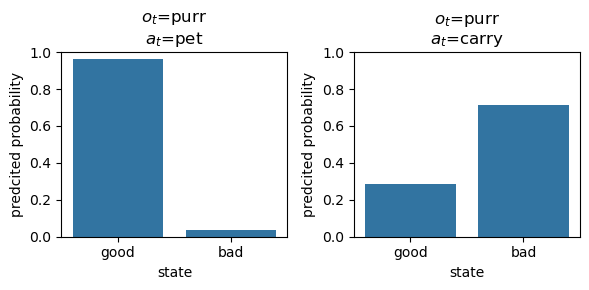

In [19]:
plot_future_state_pet_purr = pd.DataFrame({"state": ["good", "bad"], "predcited probability": posterior_future_state_pet_purr})
plot_future_state_carry_purr = pd.DataFrame({"state": ["good", "bad"], "predcited probability": posterior_future_state_carry_purr})

fig, ax = plt.subplots(ncols=2,figsize=[6,3])
sns.barplot(data=plot_future_state_pet_purr, x="state", y="predcited probability", ax=ax[0])
ax[0].set_ylim([0,1])
ax[0].set_title("$o_{t}$=purr\n$a_{t}$=pet")
sns.barplot(data=plot_future_state_carry_purr, x="state", y="predcited probability", ax=ax[1])
ax[1].set_ylim([0,1])
ax[1].set_title("$o_{t}$=purr\n$a_{t}$=carry")
plt.tight_layout()
plt.show()

And we can predict state probabilities after having observed "walk away" for the two actions.

For "pet":

In [20]:
posterior_future_state_pet_walk = np.dot(state_transition_matrix[0,:,:], posterior_states_walk)

print("posterior over future states after observing walk away and doing pet")
print(posterior_future_state_pet_walk)

posterior over future states after observing walk away and doing pet
[0.70636364 0.29363636]


We can do similarly for the action "carry":

In [21]:
posterior_future_state_carry_walk = np.dot(state_transition_matrix[1,:,:], posterior_states_walk)

print("posterior over future states after observing walk away and doing carry")
print(posterior_future_state_carry_walk)

posterior over future states after observing walk away and doing carry
[0.15454545 0.84545455]


And plot the values for both actions

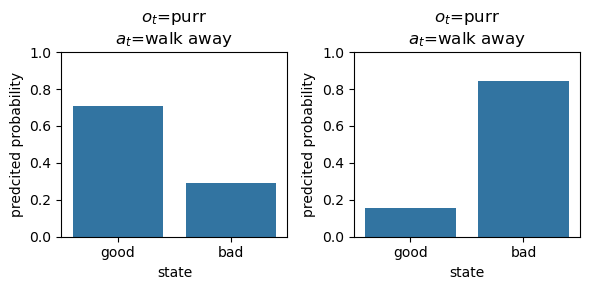

In [22]:
plot_future_state_pet_walk = pd.DataFrame({"state": ["good", "bad"], "predcited probability": posterior_future_state_pet_walk})
plot_future_state_carry_walk = pd.DataFrame({"state": ["good", "bad"], "predcited probability": posterior_future_state_carry_walk})

fig, ax = plt.subplots(ncols=2,figsize=[6,3])
sns.barplot(data=plot_future_state_pet_walk, x="state", y="predcited probability", ax=ax[0])
ax[0].set_ylim([0,1])
ax[0].set_title("$o_{t}$=purr\n$a_{t}$=walk away")
sns.barplot(data=plot_future_state_carry_walk, x="state", y="predcited probability", ax=ax[1])
ax[1].set_ylim([0,1])
ax[1].set_title("$o_{t}$=purr\n$a_{t}$=walk away")
plt.tight_layout()
plt.show()

<b>1b.3.2. Predicting observations</b>

<img src="Prediction_Observervation_gen_mod.png" width="200"/>

We can use the posterior over future states to predict future observations. This again works via using a matrix multiplication of the predicted state with our knowledge about outcome likelihoods.

We can in do this again for all combinations of having seen {purr, walk away} and having done {pet, carry}.

Having seen purr:

In [23]:
posterior_future_observation_pet_purr = np.dot(observation_likelihood, posterior_future_state_pet_purr)

print("posterior over future observations after having observed purr and executed the action pet")
print(posterior_future_observation_pet_purr)

posterior_future_observation_carry_purr = np.dot(observation_likelihood, posterior_future_state_carry_purr)

print("posterior over future observations after having observed purr and executed the action carry")
print(posterior_future_observation_carry_purr)

posterior over future observations after having observed purr and executed the action pet
[0.87417241 0.12582759]
posterior over future observations after having observed purr and executed the action carry
[0.40034483 0.59965517]


And we can plot the values for both possible actions

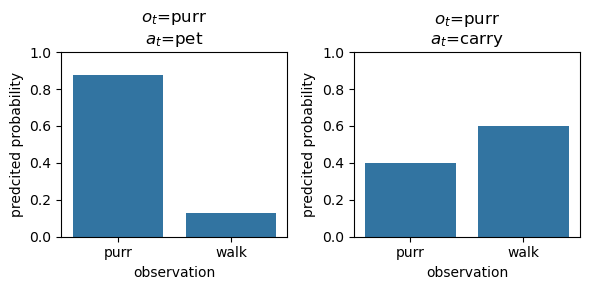

In [24]:
plot_future_obs_pet_purr = pd.DataFrame({"observation": ["purr", "walk"], "predcited probability": posterior_future_observation_pet_purr})
plot_future_obs_carry_purr = pd.DataFrame({"observation": ["purr", "walk"], "predcited probability": posterior_future_observation_carry_purr})

fig, ax = plt.subplots(ncols=2,figsize=[6,3])
sns.barplot(data=plot_future_obs_pet_purr, x="observation", y="predcited probability", ax=ax[0])
ax[0].set_ylim([0,1])
ax[0].set_title("$o_{t}$=purr\n$a_{t}$=pet")
sns.barplot(data=plot_future_obs_carry_purr, x="observation", y="predcited probability", ax=ax[1])
ax[1].set_ylim([0,1])
ax[1].set_title("$o_{t}$=purr\n$a_{t}$=carry")
plt.tight_layout()
plt.show()

Having seen walk away:

In [25]:
posterior_future_observation_pet_walk = np.dot(observation_likelihood, posterior_future_state_pet_walk)

print("posterior over future observations after having observed walk away and executed the action pet")
print(posterior_future_observation_pet_walk)

posterior_future_observation_carry_walk = np.dot(observation_likelihood, posterior_future_state_carry_walk)

print("posterior over future observations after having observed walk away and executed the action carry")
print(posterior_future_observation_carry_walk)

posterior over future observations after having observed walk away and executed the action pet
[0.69445455 0.30554545]
posterior over future observations after having observed walk away and executed the action carry
[0.30818182 0.69181818]


And we can plot the values for both possible actions

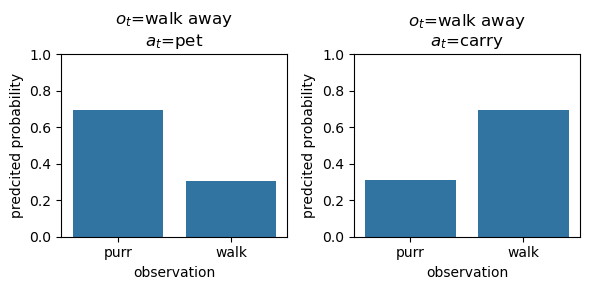

In [26]:
plot_future_obs_pet_walk = pd.DataFrame({"observation": ["purr", "walk"], "predcited probability": posterior_future_observation_pet_walk})
plot_future_obs_carry_walk = pd.DataFrame({"observation": ["purr", "walk"], "predcited probability": posterior_future_observation_carry_walk})

fig, ax = plt.subplots(ncols=2,figsize=[6,3])
sns.barplot(data=plot_future_obs_pet_walk, x="observation", y="predcited probability", ax=ax[0])
ax[0].set_ylim([0,1])
ax[0].set_title("$o_{t}$=walk away\n$a_{t}$=pet")
sns.barplot(data=plot_future_obs_carry_walk, x="observation", y="predcited probability", ax=ax[1])
ax[1].set_ylim([0,1])
ax[1].set_title("$o_{t}$=walk away\n$a_{t}$=carry")
plt.tight_layout()
plt.show()

Note that in practice, only one observation $o_{t}$ has been observed, so predictions only have to be made for one scenario

#### <b>1b.4. Goals and planning as inference</b>

Above, we have predicted future states and outcomes for both of our possible actions. But how do we know which is better and what to choose? For this we need a goal, i.e. a desired state or outcome that we want to achieve by executing an action.

<img src="Action_Selection_gen_mod.png" width="200"/>

In the planning as inference framework, goals are encoded by conditioning on a desired state or outcome in addition to the perceived outcome. As an example, we can ask the question, what action should I do, so that I will perceive the "purr" observation in the upcoming timestep at $t+1$, after I just saw "walk away"? 

$$p(a_{t}|o_{t}=\text{walk away}, o_{t+1}=\text{purr})$$

Evidence for the action "pet":

In [27]:
unnormalized_desired_states_pet_walk = posterior_future_state_pet_walk * observation_likelihood[0]

print("unnormalized desired future state when having seen walk away and planning the action pet")
print("note that the smaller the numbers in this, the more were the desired states and predicted states in disagreement")
print(unnormalized_desired_states_pet_walk)

evidence_pet_walk = unnormalized_desired_states_pet_walk.sum()

print("evidence for action pet being desired, after having seen walk away")
print(evidence_pet_walk)

unnormalized desired future state when having seen walk away and planning the action pet
note that the smaller the numbers in this, the more were the desired states and predicted states in disagreement
[0.63572727 0.05872727]
evidence for action pet being desired, after having seen walk away
0.6944545454545454


Evidence for the action "carry":

In [28]:
unnormalized_desired_states_carry_walk = posterior_future_state_carry_walk * observation_likelihood[0]

print("unnormalized desired future state when having seen walk away and planning the action pet")
print("note that the smaller the numbers in this, the more were the desired states and predicted states in disagreement")
print(unnormalized_desired_states_carry_walk)

evidence_carry_walk = unnormalized_desired_states_carry_walk.sum()

print("evidence for action pet being desired, after having seen walk away")
print(evidence_carry_walk)

unnormalized desired future state when having seen walk away and planning the action pet
note that the smaller the numbers in this, the more were the desired states and predicted states in disagreement
[0.13909091 0.16909091]
evidence for action pet being desired, after having seen walk away
0.3081818181818182


In summary, we found higher evidence that the action "pet" ($0.69$) will lead to the desired outcome "purr", and lower evidence for "carry" ($0.31$)

As a last step to action selection, we want to combine the evidences so that they form a kind of likelihood.

To do this, we simply stack our two evidences and normalize:

In [29]:
unnormalized_prob_actions = np.array([evidence_pet_walk, evidence_carry_walk])

print(unnormalized_prob_actions)

evidence_prob_actions = unnormalized_prob_actions / unnormalized_prob_actions.sum()

print(evidence_prob_actions)

[0.69445455 0.30818182]
[0.69262852 0.30737148]


And plot the values

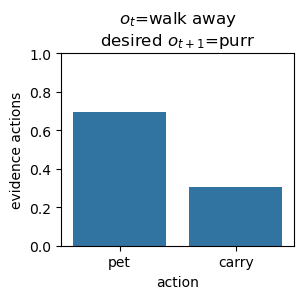

In [30]:
plot_ev_prob_actions = pd.DataFrame({"action": ["pet", "carry"], "evidence actions": evidence_prob_actions})

plt.figure(figsize=[3,2.5])
sns.barplot(data=plot_ev_prob_actions, x="action", y="evidence actions")
plt.ylim([0,1])
plt.title("$o_{t}$=walk away\ndesired $o_{t+1}$=purr")
plt.show()

#### <b> 1b.5. Automatic behavior in the prior over actions</b>

We combine the prior that we specified in the generative model with the evidence from above
$$p(a_{t}|o_{t}=\text{walk away},o_{t+1}=\text{purr}) = \text{evidence}*p(a_{t})$$

For visualization, let's look at the prior again:

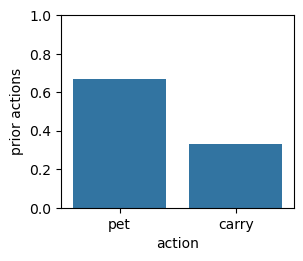

In [31]:
plot_prior_actions = pd.DataFrame({"action": ["pet", "carry"], "prior actions": prior_actions})

plt.figure(figsize=[3,2.5])
sns.barplot(data=plot_prior_actions, x="action", y="prior actions")
plt.ylim([0,1])
plt.show()

In [32]:
unnormalized_actions_with_prior = evidence_prob_actions*prior_actions

posterior_actions = unnormalized_actions_with_prior / unnormalized_actions_with_prior.sum()

print("posterior over actions after observing walk away, with a habit prior")
print(posterior_actions)

posterior over actions after observing walk away, with a habit prior
[0.82063003 0.17936997]


And plot the values

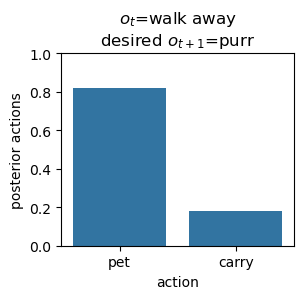

In [33]:
plot_posterior_actions = pd.DataFrame({"action": ["pet", "carry"], "posterior actions": posterior_actions})

plt.figure(figsize=[3,2.5])
sns.barplot(data=plot_posterior_actions, x="action", y="posterior actions")
plt.ylim([0,1])
plt.title("$o_{t}$=walk away\ndesired $o_{t+1}$=purr")
plt.show()

Feel free to play around with the influence of such a prior on action selection by using different numbers up in the definition or here

In [34]:
prior_actions_test = np.array([0.95, 0.05])

unnormalized_actions_with_prior_test = unnormalized_prob_actions*prior_actions_test

posterior_actions_test = unnormalized_actions_with_prior_test / unnormalized_actions_with_prior_test.sum()

print("posterior over actions after observing walk away, with a habit prior")
print(posterior_actions_test)

posterior over actions after observing walk away, with a habit prior
[0.97717648 0.02282352]


Plot the values

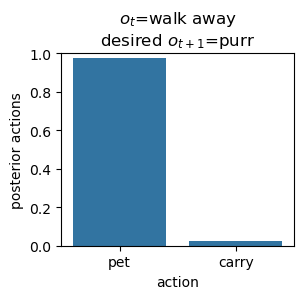

In [35]:
plot_ev_prob_actions_test = pd.DataFrame({"action": ["pet", "carry"], "posterior actions": posterior_actions_test})

plt.figure(figsize=[3,2.5])
sns.barplot(data=plot_ev_prob_actions_test, x="action", y="posterior actions")
plt.ylim([0,1])
plt.title("$o_{t}$=walk away\ndesired $o_{t+1}$=purr")
plt.show()